<a href="https://colab.research.google.com/github/khalid-7860/NATURAL-DISASTER-PREDICTION-AND-MANAGEMENT/blob/main/NATURAL_DISASTER_PREDICTION_AND_MANAGEMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Model trained with accuracy: 1.00

🧪 Sample Prediction Data:



,Rainfall,Seismic,Prediction
0,90.772484,8.969937,1
1,6.627369,5.620738,0
2,36.836339,9.043673,0
3,58.373636,2.660873,1
4,53.443415,1.828938,1


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


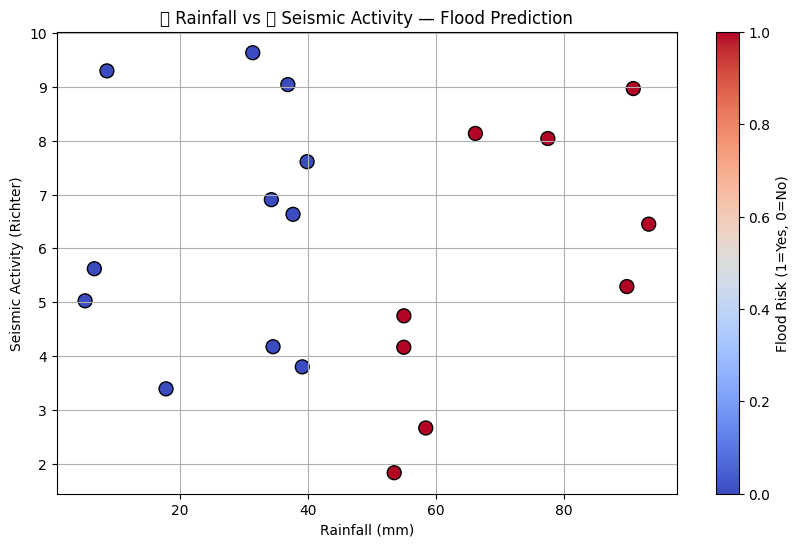

In [3]:
# --- Imports ---
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# --- Simulated IoT Sensor Data ---
def generate_rainfall_data():
    return random.uniform(0, 100)  # mm

def generate_seismic_data():
    return random.uniform(0, 10)  # Richter scale

# --- Model Training ---
data = {
    'rainfall': [15, 25, 30, 35, 50, 70, 80, 120],
    'seismic_activity': [2, 3, 1, 0.5, 1.2, 3.5, 4, 4.8],
    'flood': [0, 0, 0, 0, 1, 1, 1, 1]
}
df = pd.DataFrame(data)
X = df[['rainfall', 'seismic_activity']]
y = df['flood']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
print(f"✅ Model trained with accuracy: {model.score(X_test, y_test):.2f}")

# --- Prediction Function ---
def predict_disaster(rainfall, seismic_activity):
    input_df = pd.DataFrame([[rainfall, seismic_activity]], columns=['rainfall', 'seismic_activity'])
    prediction = model.predict(input_df)[0]
    return prediction  # 1 = Flood, 0 = No Disaster

# --- Simulate and Collect Predictions ---
simulated_data = {'Rainfall': [], 'Seismic': [], 'Prediction': []}
for _ in range(20):
    rainfall = generate_rainfall_data()
    seismic = generate_seismic_data()
    prediction = predict_disaster(rainfall, seismic)
    simulated_data['Rainfall'].append(rainfall)
    simulated_data['Seismic'].append(seismic)
    simulated_data['Prediction'].append(prediction)

sim_df = pd.DataFrame(simulated_data)
print("\n🧪 Sample Prediction Data:\n")
display(sim_df.head())

# --- Plotting ---
plt.figure(figsize=(10, 6))
plt.scatter(sim_df['Rainfall'], sim_df['Seismic'],
            c=sim_df['Prediction'], cmap='coolwarm', s=100, edgecolor='k')
plt.xlabel("Rainfall (mm)")
plt.ylabel("Seismic Activity (Richter)")
plt.title("🌧️ Rainfall vs 🌍 Seismic Activity — Flood Prediction")
plt.grid(True)
cbar = plt.colorbar()
cbar.set_label("Flood Risk (1=Yes, 0=No)")
plt.show()
